In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.linear_model import LinearRegression

In [8]:
%matplotlib inline
%matplotlib notebook

In [11]:
np.random.seed(10)
x=np.array([i*np.pi/180 for i in range(60,300,4)])
y= np.sin(x) + np.random.normal(0,0.15,len(x))

In [12]:
data = pd.DataFrame(np.column_stack([x,y]),columns=['x_1','y'])

<IPython.core.display.Javascript object>


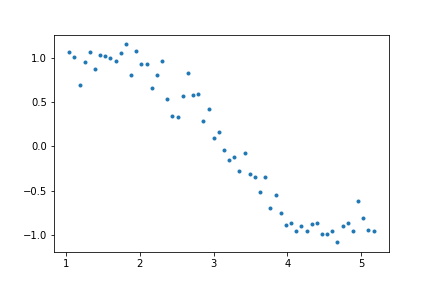

In [13]:
plt.plot(data['x_1'],data['y'],'.')

In [15]:
for i in range (2,17):
    colname='x_'+str(i)
    data[colname]=data['x_1']**i

In [16]:
data.head()

,x_1,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235,2.091500
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479,5.873777
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521,15.494604
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450,38.668544
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170,91.844966


In [18]:
#Linear Regration 

X=data[['x_1']]
y=data['y']


In [19]:
X.head()

,x_1
0,1.047198
1,1.117011
2,1.186824
3,1.256637
4,1.326450


In [20]:
linear_regression = LinearRegression(normalize=True)
linear_regression.fit(X,y)
y_pred = linear_regression.predict(X)

<IPython.core.display.Javascript object>


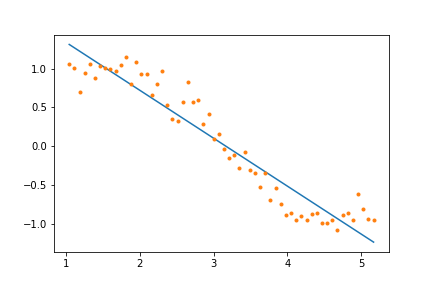

In [21]:
plt.plot(data['x_1'],y_pred)
plt.plot(data['x_1'],data['y'],'.')

In [22]:
#Multiple Linear Regression (High Variance)
X=data.drop(['y'],axis=1)
y=data['y']

In [23]:
X.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16
0,1.047198,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235,2.091500
1,1.117011,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479,5.873777
2,1.186824,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521,15.494604
3,1.256637,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450,38.668544
4,1.326450,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170,91.844966


In [24]:
linear_regression = LinearRegression(normalize=True)
linear_regression.fit(X,y)
y_pred = linear_regression.predict(X)

<IPython.core.display.Javascript object>


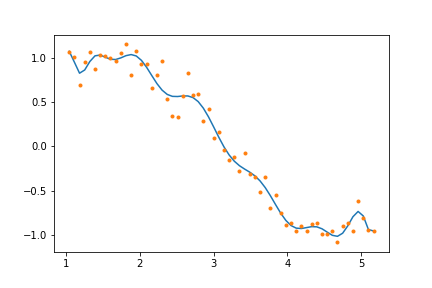

In [25]:
plt.plot(data['x_1'],y_pred)
plt.plot(data['x_1'],data['y'],'.')

In [29]:
def linear_regression(power):
    columns=[]
    for i in range(1,power+1):
        columns.append('x_'+str(i))
    X=data[columns]
    y=data['y']
    
    model= LinearRegression(normalize=True)
    model.fit(X,y)
    y_pred = model.predict(X)
    plt.plot(data['x_1'],y_pred)
    plt.plot(data['x_1'],data['y'],'.')

<IPython.core.display.Javascript object>


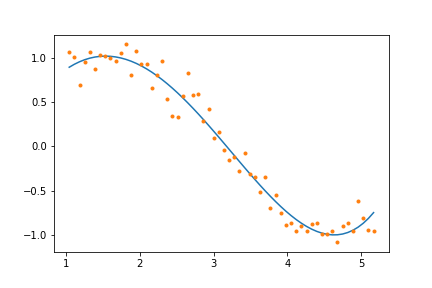

In [37]:
linear_regression(4)

In [56]:
from sklearn.linear_model import Ridge,Lasso

In [54]:
def ridge_regression(alpha):
    X= data.drop(['y'],axis=1)
    y=data['y']
    ridge_regression=Ridge(alpha=alpha,normalize=True)
    ridge_regression.fit(X,y)
    y_pred = ridge_regression.predict(X)
    plt.plot(data['x_1'],y_pred)
    plt.plot(data['x_1'],data['y'],'.')

<IPython.core.display.Javascript object>


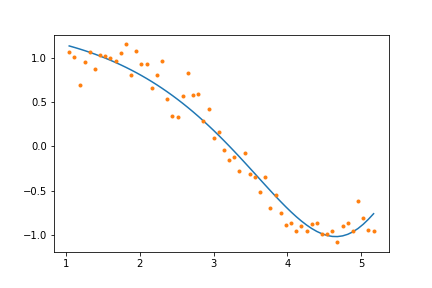

In [55]:
alpha_vals=[1e-15,1e-10,1e-5,1e-2,1e5,1e10]

ridge_regression(0.01)

In [70]:
def lasso_regression(alpha):
    X =data.drop(['y'],axis=1)
    y=data['y']
    lasso_regression =Lasso(alpha=alpha,normalize=True)
    lasso_regression.fit(X,y)
    y_pred = lasso_regression.predict(X)
    plt.plot(data['x_1'],y_pred)
    plt.plot(data['x_1'],data['y'],'.')
    print(lasso_regression.coef_)

<IPython.core.display.Javascript object>


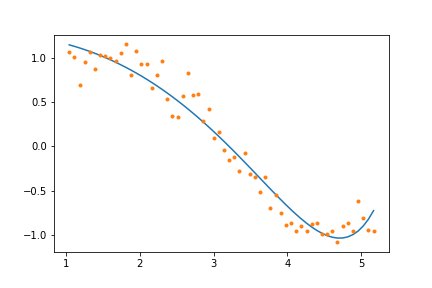

[-0.00000000e+00 -9.72197923e-02 -8.49695734e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.04141663e-07  5.31348099e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00]


In [72]:
alpha_vals=[1e-15,1e-10,1e-5,1e-2,1e5,1e10]
alpha_vals=0.01
lasso_regression(0.5e-3)
